# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 8</center>

# <center>Non-Linear Regression</center>

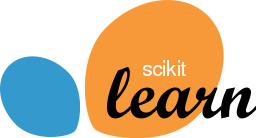

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Polynomial regression to implement non-linear models. Use regularization concepts to overcome overfitting problem in machine learning.

By the end of the lab, you should be able to :
- Differentiate overfitting and underfitting issues in machine learning.


- Implement polynomial features to apply non-linear models and overcome underfitted models.


- Implment regularization to overcome overfitted models.




## <font color = blue>1. Loading Data

    - Lets load boston housing data set for this problem.
    

In [6]:
#import libraries first

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [7]:
#Load datasets

from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [8]:
boston_df['target'] = boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

## <font color = blue> 2. Train test split


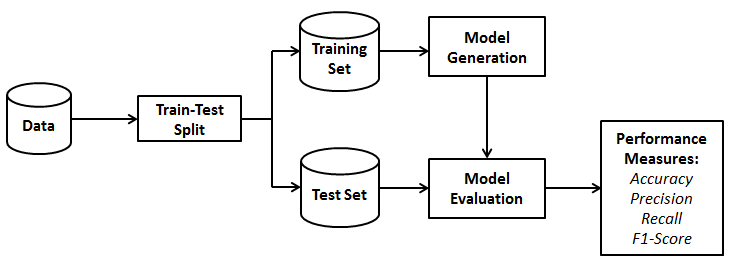

1.   Split the data to 80% training and 20% testing
2.   Get the Estimator (ML algorithm aka learner)

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`


### <font color = "7DCE13">To simplify the model and to visualize data distribution in two dimensional space, lets consider only one feature first.

In [9]:
from sklearn.model_selection import train_test_split

# Before splitting the data, lets choose any one feature as X
X = boston_df['LSTAT']
Y = boston_df.target
#Split the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)
X_train,X_test,Y_train,Y_test

(33     18.35
 283     3.16
 418    20.62
 502     9.08
 402    20.31
        ...  
 486    14.98
 189     5.39
 495    17.60
 206    10.97
 355     5.57
 Name: LSTAT, Length: 404, dtype: float64,
 226     3.13
 292     4.70
 90      8.81
 373    34.77
 273     6.58
        ...  
 349     5.89
 212    16.03
 156    16.14
 480    10.74
 248     9.52
 Name: LSTAT, Length: 102, dtype: float64,
 33     13.1
 283    50.0
 418     8.8
 502    20.6
 402    12.1
        ... 
 486    19.1
 189    34.9
 495    23.1
 206    24.4
 355    20.6
 Name: target, Length: 404, dtype: float64,
 226    37.6
 292    27.9
 90     22.6
 373    13.8
 273    35.2
        ... 
 349    26.6
 212    22.4
 156    13.1
 480    23.0
 248    24.5
 Name: target, Length: 102, dtype: float64)

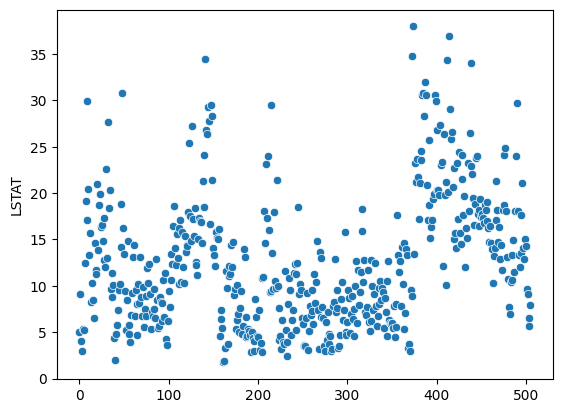

In [20]:
#Lets plot scatter plot to check relation in two dimensional space.
sns.scatterplot(X)
plt.show()

## <font color=blue> 3. Train Simple Linear Model    

### <font color="green"> 3.1. Create and Train model 
    
- Lets create simple Linear Regression model

In [23]:
#create model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#train the model by fitting data
lr.fit(X_train.values.reshape(-1,1),Y_train)

LinearRegression()

### <font color="green"> 3.2. Test Model 
- Testing or evaluating a machine learning model is a crucial step in machine workflow. It allows machine learning engineer to discover underfitting and overfitting problem in the trained model.


In [25]:
#lets find predicted value for trained data
Y_pred = lr.predict(X_test.values.reshape(-1,1))
Y_pred

array([31.80610519, 30.26780089, 26.24077499,  0.80486439, 28.42575498,
        8.77073316, 29.34677794, 26.98543185, 24.91802925, 20.8028203 ,
       28.80788153, 25.32955015, 25.10419347, 28.0828209 , 27.29897158,
       22.458702  ,  1.19678906, 21.86101688, 14.15969727, 24.96701983,
        5.79210572, 23.97741006, 30.81649542, 24.72206692, 27.18139418,
       11.56319638, 28.1416096 , 23.07598334, 29.30758547, 29.49374969,
        9.9759015 , 11.38683028, 18.8529951 , 18.47086855, 26.37794862,
       22.86042477, 25.52551248, 10.97530939, 29.08222879, 32.9328886 ,
       20.00917285,  1.15759659, 27.42634709, 16.2466961 , 27.63210754,
       28.92545893, -1.36051937, 17.30489268, 21.05757133, 11.20066607,
       21.06736944, 22.3411246 , 26.11339947, 14.94354659, 19.40168963,
       29.21940242, 31.37498807, 17.10893035, 28.72949659, 21.6944489 ,
       20.83221465, 24.96701983, 18.02995331, 30.37558018, 23.62467787,
       15.50203924, 22.33132648, 27.58311696, 25.19237652, 23.65

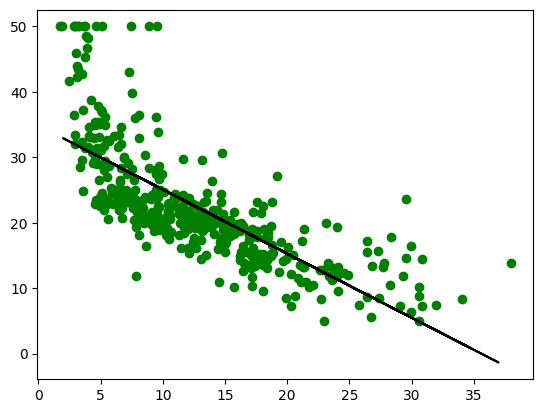

In [29]:
#lets plot prediction line

plt.scatter(X_train, Y_train,color='g') 

plt.plot(X_test, Y_pred,color='k') 

In [ ]:
#Lets check model's r2 score for train data




In [ ]:
# lets ckeck model's r2 score for test data




### <font color = "7DCE13"> Problem: We noticed that both models' train accuracy, as well as test accuracy, is very low. Such a situation is also called High Bias or Underfitting. 
    
### <font color = "7DCE13"> Underfitting occurs when the model fails to capture the relationship between input and output features due to a lack of enough features to capture the pattern.
    
### <font color = "7DCE13"> Solution?
    - Increase Number of Features
    
    - Increase Model's Complexity(Apply polynomial Features)


## <font color=blue> 4. Train Non-Linear Model (Polynomial regression)   

### <font color="green"> 4.1. Create Polynomial Features 


In [ ]:

#create PolynomialFeatures Features




### <font color="green"> 4.2. Train Non-linear Model (Polynomial Regression)


In [ ]:
#lets create model first



#train the model





### <font color="green"> 4.3. Test Non-Linear Model 


In [ ]:
#find Predicted value for non-linear Model




In [ ]:
#I want to plot prediction line for non-linear model. Lets create dataframe out of POlynomial Features
#Lets add dummy features names




In [ ]:
#Lets add predicted output as new col in the dataframe




In [ ]:
#LEts sort the dataframe to get continuous prediction line




In [ ]:
#lets plot the prediction line



In [ ]:
#Lets check train score



In [ ]:
#Lets Check Test Score



### <font color = "7DCE13"> Takeaway: We noticed that model performance is better than Simple Linear Model. In other word, model performance is improving as we increase model's complexity. Lets try adding more features.
    


## <font color = blue>5. Increasing Features
    
   - Lets choose all the Features availabe in boston housing dataset and add non-linear model with 2 degree polynomial features.


### <font color="green"> 5.1. Add more features


In [ ]:
#Lets create new X, y remains same




### <font color="green"> 5.2. Split new data for train and test


### <font color="green"> 5.3. Apply Polynomial Features to new features


In [ ]:
#create PolynomialFeatures Features





### <font color="green"> 5.4. Train model


In [ ]:
#create model 




### <font color="green"> 5.4. Test model


In [ ]:
#Check train score


In [ ]:
#check test score



### <font color = "7DCE13"> Takeaway: We noticed that training accuracy has improved from 60% to 93 percent. However, we see test accuracy is very low compared to train accuracy. Such situation is called as overfitting or High Variance.
    
    
Solution?
    
    - Feature Selection
    
    - Increasing Training samples
    
    - Regularization


## <font color=blue> 6. Regularization
    

### <font color="green"> 6.1. Ridge (L2 Regularization)

`class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)`

In [ ]:

#create model



#train the model



#Find the train score



In [ ]:
#Find test Score




### <font color="green"> 6.1. Lasso (L1 Regularization)

    
`class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')`

In [ ]:

#create model


#Train model


#find train score



In [ ]:
#Find test score for Lasso Model




### <font color = "7DCE13"> Takeaway: After applying Regularization to our model, we can bring our train score and test score almost equal to each other. With this technique we are able to overcome the overfitted model. However, the choice of lamda value is very important.
